In [1]:

import numpy  as np
import pandas as pd


from models.classifiers import Classifiers
from models.custom_ml_classifiers import CustomMLClassifiers

import warnings
warnings.filterwarnings('ignore')


In [2]:

# data paths
path_train_baseline = "./data/train_imputed.csv"


In [3]:

# read data into data frame
df_train = pd.read_csv(path_train_baseline)
df_train.head()


,ID,VAR0,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,...,CAT3,CAT4,CAT5,CAT6,CAT7,CAT8,CAT9,CAT10,CAT11,CAT12
0,0,0.799805,0.184174,0.000000,0.000000,0.168984,0.037037,0.000000,0.200195,0.788112,...,2.0,4.0,3.0,2.0,2.0,2.0,7.0,7.0,0.0,0.0
1,1,0.725049,0.180594,0.000000,0.000000,0.165312,0.090790,0.054237,0.255107,0.722679,...,1.0,3.0,0.0,3.0,26.0,3.0,2.0,26.0,26.0,3.0
2,2,0.799805,0.199255,0.000000,0.000000,0.167613,0.000000,0.000000,0.200195,0.788112,...,2.0,2.0,6.0,2.0,15.0,2.0,7.0,15.0,15.0,0.0
3,3,0.677137,0.209870,0.166667,0.181818,0.190511,0.222222,0.125000,0.322863,0.788112,...,0.0,1.0,3.0,1.0,19.0,2.0,7.0,19.0,19.0,0.0
4,4,0.725049,0.180594,0.000000,0.000000,0.165312,0.000000,0.054237,0.255107,0.722679,...,1.0,4.0,0.0,3.0,26.0,3.0,2.0,26.0,26.0,3.0


Training GAUSSIANNB...
 executed in 0.1 seconds.
Training DecisionTree...
 executed in 0.5 seconds.
Training LogisticReg...
 executed in 0.2 seconds.
Training RandomForest...
 executed in 4.6 seconds.
Training LightGBM...
 executed in 0.3 seconds.


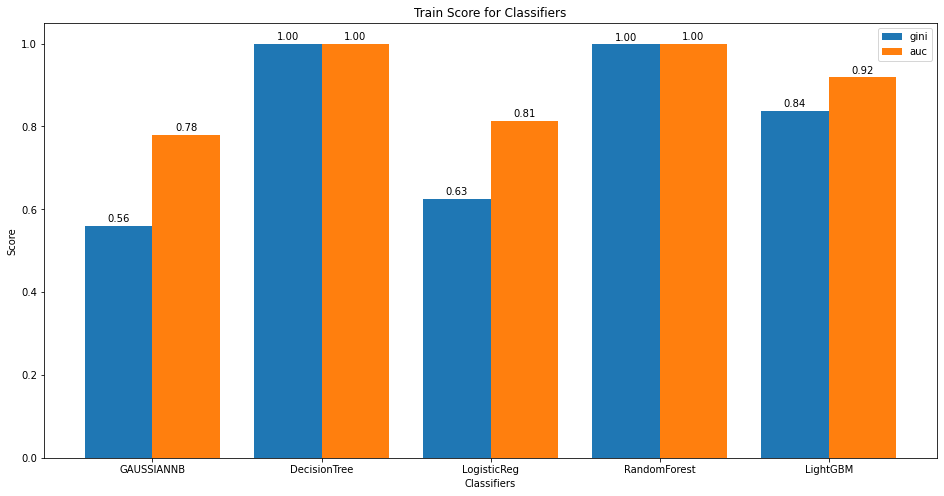

Testing GAUSSIANNB...
 ###### Confusion Matrix #######
[[4032 1670]
 [  86  212]]
 ###############################
 executed in 0.0 seconds.
Testing DecisionTree...
 ###### Confusion Matrix #######
[[5399  303]
 [ 254   44]]
 ###############################
 executed in 0.0 seconds.
Testing LogisticReg...
 ###### Confusion Matrix #######
[[5682   20]
 [ 284   14]]
 ###############################
 executed in 0.0 seconds.
Testing RandomForest...
 ###### Confusion Matrix #######
[[5696    6]
 [ 294    4]]
 ###############################
 executed in 0.2 seconds.
Testing LightGBM...
 ###### Confusion Matrix #######
[[5696    6]
 [ 296    2]]
 ###############################
 executed in 0.0 seconds.


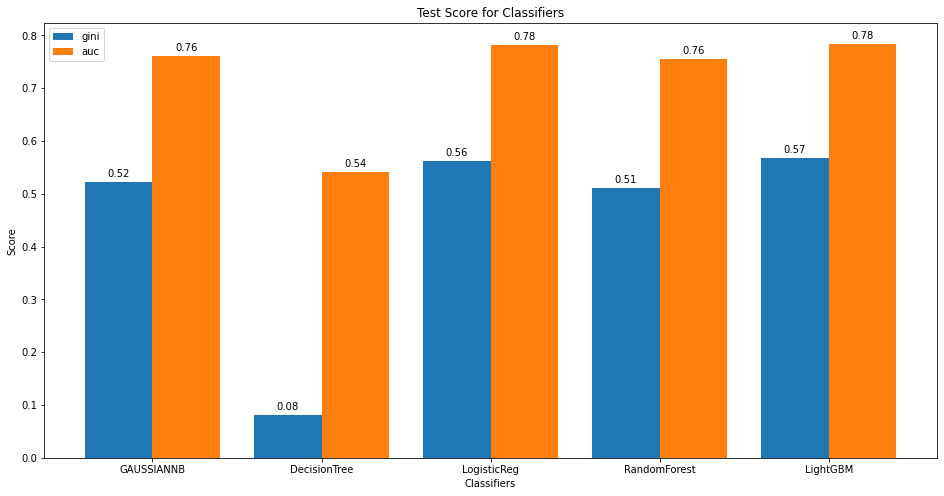

In [4]:

col     = "TARGET"
exclude = ["ID"]

# drop excluded columns and target column for X value
X = df_train.drop(exclude + [col], axis=1).values

# get target values
y = df_train[col].values

classifiers  = Classifiers(X, y, test_size=0.20, classifiers = CustomMLClassifiers.list(set_class_weight=True))

scores_train = classifiers.compare_train(cv=5)
score_test   = classifiers.compare_test()

